In [2]:
# https://github.com/Mazen-ALG/The-Data-Series/blob/master/Episode%204.7/Polynomial%20Regression.ipynb
# https://www.youtube.com/watch?v=2YzF9D_r16o
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

weather_data_p = pd.read_csv("datasets/WeatherDataP.csv")
weather_data_p.head(10)

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


Text(0, 0.5, 'Humidity')

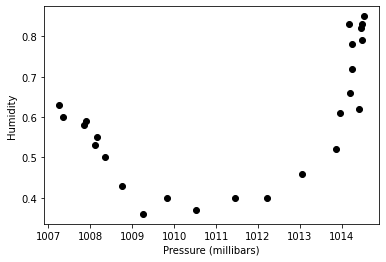

In [6]:
# Set our input x to Pressure, use [[]] to convert to 2D array suitable for model input
X = weather_data_p[["Pressure (millibars)"]]
y = weather_data_p.Humidity

# Produce a scatter graph of Humidity against Pressure
plt.scatter(X, y, c = "black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

In [10]:
# Import the function "PolynomialFeatures" from sklearn, to preprocess our data
# Import LinearRegression model from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
pre_process = PolynomialFeatures(degree=2)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)

# Show the transformation on the notebook
X_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [12]:
df_X_poly = pd.DataFrame(X_poly)
df_X_poly.columns = ['1','x','x_squared']
df_X_poly.head()

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06


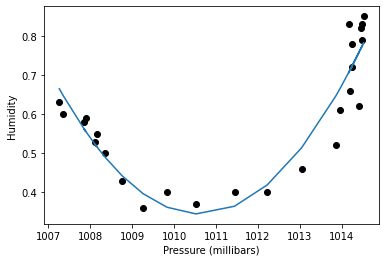

In [13]:
pr_model = LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, y)

# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)

# Plot our model on our data
plt.scatter(X, y, c = "black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, y_pred)

In [21]:
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_

theta0, theta1, theta2

(29167.74604360524, -57.722545420773706, 0.028558357296553538)

In [30]:
y_new = pr_model.predict(pre_process.fit_transform([[1010]]))
y_new

array([0.35544684])

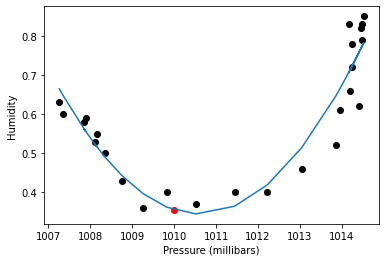

In [31]:
plt.scatter(X, y, c = "Black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, y_pred)
plt.scatter(1010, y_new, c = "red")

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.0033583683723371355